Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost =   2.979106
Epoch: 0002 cost =   1.182606
Epoch: 0003 cost =   0.935094
Epoch: 0004 cost =   0.811340
Epoch: 0005 cost =   0.732596
Epoch: 0006 cost =   0.676706
Epoch: 0007 cost =   0.635373
Epoch: 0008 cost =   0.602373
Epoch: 0009 cost =   0.575411
Epoch: 0010 cost =   0.553718
Epoch: 0011 cost =   0.534830
Epoch: 0012 cost =   0.517815
Epoch: 0013 cost =   0.503789
Epoch: 0014 cost =   0.491034
Epoch: 0015 cost =   0.479231
Accuracy:  0.887
Label :  [2]
Prediction :  [2]


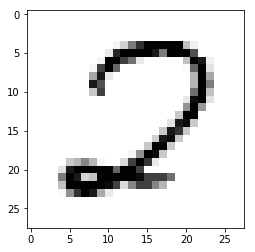

Label :  [8]
Prediction :  [5]


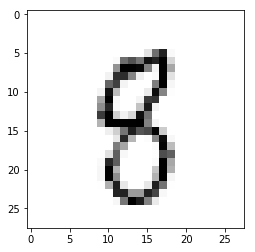

Label :  [7]
Prediction :  [7]


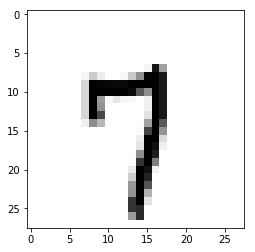

Label :  [8]
Prediction :  [8]


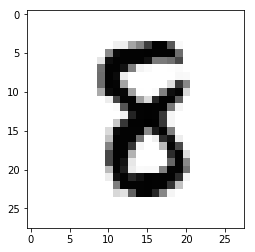

Label :  [5]
Prediction :  [0]


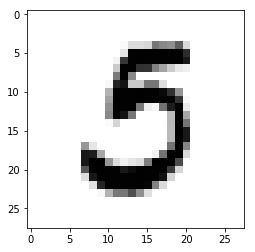

Label :  [7]
Prediction :  [7]


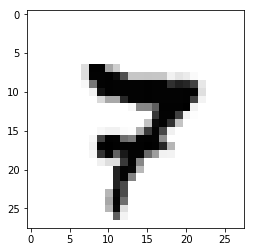

Label :  [4]
Prediction :  [8]


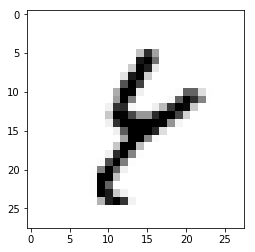

Label :  [7]
Prediction :  [7]


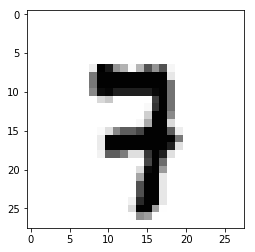

Label :  [0]
Prediction :  [0]


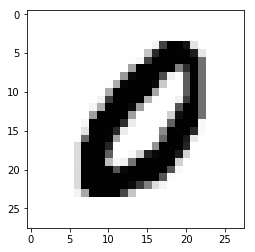

Label :  [1]
Prediction :  [1]


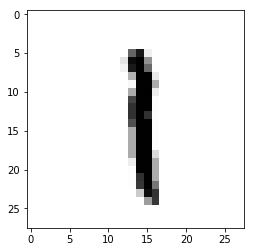

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import random

sz_img = 28*28 # 28 * 28 pixels
num_of_classes = 10 # 0~9 digits

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

X = tf.placeholder(tf.float32,[None,sz_img])
Y = tf.placeholder(tf.float32,[None,num_of_classes])
W = tf.Variable(tf.random_normal([sz_img,num_of_classes]))
b = tf.Variable(tf.random_normal([num_of_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15 # 1 epoch : 전체 데이터셋을 한번 학습하는 단위
batch_size = 100 # 1 epoch 당 학습할 데이터
# 전체 데이터가 1500개 라면 15 epoch 소요. 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) # batch_size 만큼 나누어 학습
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost += c/total_batch
        print('Epoch:','%04d' %(epoch+1),'cost = ','{:9f}'.format(avg_cost))
    
    print("Accuracy: ", accuracy.eval(session=sess,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
    for i in range(10):
        r = random.randint(0,mnist.test.num_examples-1)
        print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
        print("Prediction : ", sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

        plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation="nearest")
        plt.show()

